## Analysis 2 - US relations with ethnic and religious groups

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from pandas.tools import plotting
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import glob
import zipfile
import operator
%matplotlib inline

#### Check if the Dataframe pickle exists. If not, create it using downloaded compressed files.

In [2]:
def filterEthnicRelations(data_dir, compressed_path, extracted_path):
    US_code = 'US'
    for zip_name in glob.glob(compressed_path + '/*.zip'):
        #print('extracting:', zip_name)
        z = zipfile.ZipFile(file = zip_name, mode = 'r')    
        z.extractall(path = extracted_path)
        # open the extracted file and filter lines
        csv_file_name = zip_name.replace('compressed', 'extracted/analysis2')[:-4]
        filtered_file_name = csv_file_name[:-7] + 'filtered.csv'
        with open(csv_file_name, mode='r') as extracted_file, open(filtered_file_name, mode='w') as filtered_file:
            #print('using:', extracted_file, 'writing to:', filtered_file)
            for line in extracted_file:
                # extract lines with our interest country code
                countries_involved = operator.itemgetter(51)(line.split('\t'))
                ethnic_religious_groups_involved = operator.itemgetter(9, 10, 19, 20)(line.split('\t'))
                ethnic_religious_groups_involved = list(filter(None, ethnic_religious_groups_involved))
                if US_code in countries_involved:                      
                    if ethnic_religious_groups_involved:
                        filtered_file.write(line)

        # delete the temporary extracted file
        os.remove(csv_file_name)
    
    print('Filtered files are saved in dir:', extracted_path)

In [3]:
def prepareDataFrameFromFilteredCSVs(data_dir, extracted_path, pickle_path):
    # Get column headers from the helper file (available under /extra directory)
    col_headers = pd.read_excel(data_dir + '../extra/CSV.header.fieldids.xlsx', sheetname='Sheet1', 
                             index_col='Column ID', parse_cols=1)['Field Name']
    filtered_csv_files = glob.glob(extracted_path + '/*')
    dfs = []
    for current_file in filtered_csv_files:
        dfs.append(pd.read_csv(current_file, sep='\t', header=None, dtype=str,
                                  names=col_headers, index_col=['GLOBALEVENTID']))

    combined_df = pd.concat(dfs)
    combined_df.to_pickle(pickle_path)    
    print('Combined pickled dataframe is saved at:', pickle_path)

In [4]:
data_dir = '../data/'
pickle_path =  data_dir +'pickled/analysis2/gdelt_analysis2.pickle'
compressed_path = data_dir + 'compressed/'
extracted_path = data_dir + 'extracted/analysis2'

if not os.path.exists(pickle_path):
    if len(os.listdir(extracted_path)) <= 2:
        filterEthnicRelations(data_dir, compressed_path, extracted_path)
    else:
        print('Filtered CSVs already exist')
    prepareDataFrameFromFilteredCSVs(data_dir, extracted_path, pickle_path)    
    print('Pickle file created. Ready to perform analysis.')
else:
    print('Pickle file exists. Ready to perform analysis.')

Pickle file exists. Ready to perform analysis.


#### Read the pickle file and take the columns required for this analysis.

In [5]:
df = pd.read_pickle(pickle_path)
print('Count of rows in the dataset:',df['SQLDATE'].count())
df.head()

Count of rows in the dataset: 268408


,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
GLOBALEVENTID,,,,,,,,,,,,,,,,,,,,,
613248946,20170101,201701,2017,2017.0027,CHR,CHRISTIAN,NaN,NaN,NaN,CHR,...,TX,2,"Texas, United States",US,USTX,31.106,-97.6475,TX,20170101,http://www.hawaiinewsnow.com/story/34159492/te...
613248947,20170101,201701,2017,2017.0027,CHR,CHRISTIAN,NaN,NaN,NaN,CHR,...,TX,2,"Texas, United States",US,USTX,31.106,-97.6475,TX,20170101,http://www.hawaiinewsnow.com/story/34159492/te...
613248951,20170101,201701,2017,2017.0027,CHRPRO365,UNITED CHURCH OF CHRIST,NaN,NaN,NaN,CHR,...,408732,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20170101,http://www.journalstandard.com/news/20161231/a...
613248952,20170101,201701,2017,2017.0027,CHRPRO365,UNITED CHURCH OF CHRIST,NaN,NaN,NaN,CHR,...,IL,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20170101,http://www.journalstandard.com/news/20161231/a...
613249509,20170101,201701,2017,2017.0027,JEWHSD010,CHABAD,NaN,NaN,NaN,JEW,...,NaN,3,"Bethesda, Maryland, United States",US,USMD,38.9807,-77.1003,583184,20170101,http://www.13wmaz.com/news/giant-bagel-menorah...


In [6]:
df = df.reset_index()
df = df[['SQLDATE','ActionGeo_CountryCode','Actor1Geo_CountryCode','Actor1Code', 'Actor1Name','Actor1Type1Code',  'Actor1EthnicCode', 'Actor1Religion1Code','Actor2Geo_CountryCode','Actor2Code', 'Actor2Name', 'Actor2Type1Code', 'Actor2EthnicCode', 'Actor2Religion1Code','AvgTone','NumArticles','GoldsteinScale','QuadClass','EventRootCode','IsRootEvent', 'MonthYear', 'Year']]

#### Convert the required columns to numeric types

In [7]:
df[['AvgTone','NumArticles', 'GoldsteinScale', 'IsRootEvent', 'QuadClass', 'Year', 'MonthYear']] = df[['AvgTone','NumArticles', 'GoldsteinScale', 'IsRootEvent', 'QuadClass', 'Year', 'MonthYear']].apply(pd.to_numeric)

#### Convert the required columns to numeric types

In [8]:
df['SQLDATE'] = pd.to_datetime(df['SQLDATE'],infer_datetime_format=True)

#### Handle categorical variables

In [9]:
df['QuadClass_Cat'] = df['QuadClass'].astype("category", categories=[1,2,3,4], ordered=False)

In [10]:
df.describe()

,AvgTone,NumArticles,GoldsteinScale,QuadClass,IsRootEvent,MonthYear,Year
count,268408.000000,268408.000000,268408.000000,268408.000000,268408.000000,268408.000000,268408.000000
mean,-1.802632,13.206980,0.085787,1.875708,0.581849,201701.300807,2016.990652
std,3.624771,84.769375,4.579040,1.187068,0.493256,13.114768,0.131559
min,-26.666667,1.000000,-10.000000,1.000000,0.000000,200701.000000,2007.000000
25%,-4.205607,2.000000,-4.000000,1.000000,0.000000,201701.000000,2017.000000
50%,-1.742160,4.000000,1.000000,1.000000,1.000000,201702.000000,2017.000000
75%,0.763359,8.000000,3.400000,3.000000,1.000000,201703.000000,2017.000000
max,16.384181,8288.000000,10.000000,4.000000,1.000000,201704.000000,2017.000000


In [11]:
df = df[df['Actor2EthnicCode'].notnull() | df['Actor1EthnicCode'].notnull()]
df_ethnic = df[['Actor1EthnicCode','Actor2EthnicCode','Actor1Geo_CountryCode', 'Actor2Geo_CountryCode','AvgTone']]
print(df_ethnic.count())
df_ethnic.head()

Actor1EthnicCode         28776
Actor2EthnicCode         21543
Actor1Geo_CountryCode    46374
Actor2Geo_CountryCode    40990
AvgTone                  49476
dtype: int64


,Actor1EthnicCode,Actor2EthnicCode,Actor1Geo_CountryCode,Actor2Geo_CountryCode,AvgTone
13,NaN,sco,UK,US,1.813472
18,NaN,nai,US,US,-2.601703
19,NaN,sco,US,US,1.813472
20,nep,NaN,US,NaN,0.888892
21,sco,NaN,US,NaN,1.813472


#### Group by ethnic codes

In [12]:
df_ethnic_grouped_agg = df_ethnic.groupby('Actor2EthnicCode').agg({'AvgTone':[np.mean,'count']})

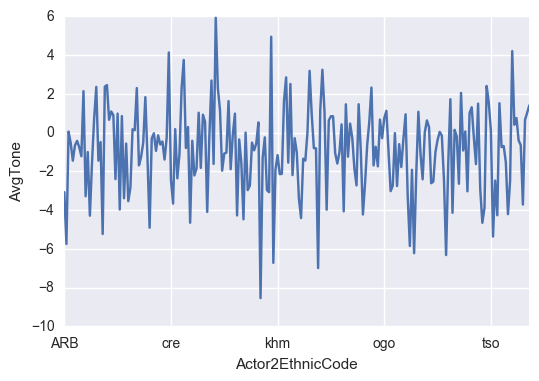

In [13]:
df_ethnic_grouped_agg['AvgTone']['mean'].plot()
plt.ylabel('AvgTone')
plt.savefig('analysis2/Ethnic_AvgTone_Mean.png')

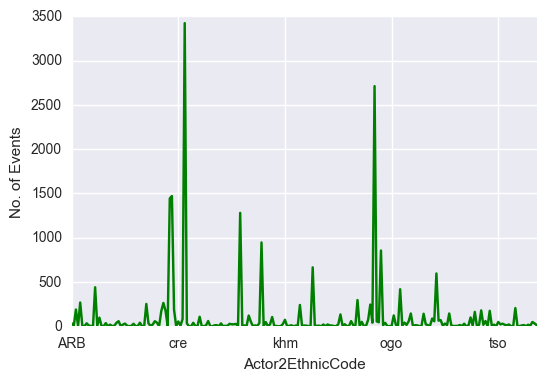

In [14]:
df_ethnic_grouped_agg['AvgTone']['count'].plot(color='g')
plt.ylabel('No. of Events')
plt.savefig('analysis2/Ethnic_Event_Count.png')

### Pull the reference data to understand the Ethnic group details

In [15]:
ethnic_codes_reference = pd.read_csv('../Extra/EthnicCodes.txt', sep='\t', encoding = "ISO-8859-1")
ethnic_codes_reference = ethnic_codes_reference.dropna()
ethnic_codes_reference.head()

,Ethnic Group Name,Code,Selected Countries
1,Abkhaz (Abkhazians),abk,"GEO, DEU, RUS, SYR, TUR, UKR"
3,Aboriginal-Australians (Aborigines),abr,AUS
5,Acehnese (Achinese),ace,"IDN, MYS"
7,Achang,acg,"CHN, MMR"
9,Acholi,ach,"SDN, UGA"


In [16]:
ethnic_codes_reference['Code'] = ethnic_codes_reference['Code '].str.strip()

In [17]:
del ethnic_codes_reference['Code ']

#### Find the most positively and negatively impacted ethnic groups

In [18]:
df_ethnic_grouped_agg['product'] = df_ethnic_grouped_agg['AvgTone']['mean'] * df_ethnic_grouped_agg['AvgTone']['count']
df_ethnic_grouped_agg = df_ethnic_grouped_agg.sort('product')
print('Top 5 negatively impacted ethinicties')
neg_top_ethnic = df_ethnic_grouped_agg.head()
neg_top_ethnic = neg_top_ethnic.reset_index()
neg_top_ethnic

Top 5 negatively impacted ethinicties


/Users/tanya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


Actor2EthnicCode   AvgTone            product
                        mean count             
0              dak -2.362416  3423 -8086.548890
1              chy -1.390854  1471 -2045.946886
2              nai -0.656125  2712 -1779.410149
3              nav -1.695377   856 -1451.242593
4              osa -2.736749   419 -1146.697726

In [19]:
print('Top 5 positively impacted ethinicties')
pos_top_ethnic = df_ethnic_grouped_agg.tail()
pos_top_ethnic = pos_top_ethnic.reset_index()
pos_top_ethnic

Top 5 positively impacted ethinicties


Actor2EthnicCode   AvgTone           product
                        mean count            
0              nap  2.322605    46  106.839813
1              men  0.842202   134  112.855072
2              moh  0.463287   297  137.596153
3              oji  1.121624   123  137.959740
4              sco  0.280097   597  167.217739

#### Merge Negatively impacted ethnic groups with Ethnic Codes Reference Data to get better understanding

In [25]:
merged_neg = neg_top_ethnic.merge(ethnic_codes_reference, left_on='Actor2EthnicCode', right_on='Code')
merged_neg = merged_neg.rename(index=str,columns={('product',''):'DerivedGoldsteinScore'})
del merged_neg[('AvgTone','mean')]
del merged_neg[('AvgTone','count')]
del merged_neg[('Actor2EthnicCode','')]
print('The top most negatively impacted Ethnic groupes are:')
merged_neg

The top most negatively impacted Ethnic groupes are:


/Users/tanya/anaconda3/lib/python3.5/site-packages/pandas/tools/merge.py:205: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,DerivedGoldsteinScore,Ethnic Group Name,Selected Countries,Code
0,-8086.548890,Sioux,USA,dak
1,-2045.946886,Cheyenne,USA,chy
2,-1779.410149,Native American,"CAN, USA",nai
3,-1451.242593,Navajo,USA,nav
4,-1146.697726,Osage,USA,osa


#### Merge Positively impacted ethnic groups with Ethnic Codes Reference Data to get better understanding

In [26]:
merged = pos_top_ethnic.merge(ethnic_codes_reference, left_on='Actor2EthnicCode', right_on='Code')
merged = merged.rename(index=str,columns={('product',''):'DerivedGoldsteinScore'})
merged = merged.sort('DerivedGoldsteinScore', ascending=False)
del merged[('AvgTone','mean')]
del merged[('AvgTone','count')]
del merged[('Actor2EthnicCode','')]
print('The top most positively impacted Ethnic groupes are:')
merged

The top most positively impacted Ethnic groupes are:


/Users/tanya/anaconda3/lib/python3.5/site-packages/pandas/tools/merge.py:205: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/tanya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,DerivedGoldsteinScore,Ethnic Group Name,Selected Countries,Code
5,167.217739,Scottish (Scots),"ARG, AUS, CAN, CHL, GBR, NZL, USA",sco
4,137.959740,Ojibwe,"CAN, USA",oji
2,137.596153,Mohajirs,PAK,moh
3,137.596153,Mohawk,USA,moh
1,112.855072,Mende,SLE,men
0,106.839813,Neapolitan,ITA,nap


### Conclusion - The Scottish people are happy with the US events, while the Sioux (Native Americans) are most badly impacted